In [55]:
D
%matplotlib

Using matplotlib backend: MacOSX


In [56]:
#Vertical resolution used : 
0.02
0.1
0.5
1.25010428797
8.33294983235
32.8082236775

32.8082236775

In [1]:
import sys, os

#sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools','meshing_ats'))
#import meshing_ats

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.signal

In [2]:
xl =pd.ExcelFile('Topo_Profiles_Barrow.xlsx')

In [3]:
xl.sheet_names
print (xl.sheet_names)
data = xl.parse(sheet_name='Transect B, Area C')
keys = data.keys()


['Transect A, Polygon near ERT', 'Transect B, Polygon near ERT', 'Transect Area B', 'Transect A, Area C', 'Transect B, Area C', 'Repeat ERT Transect']


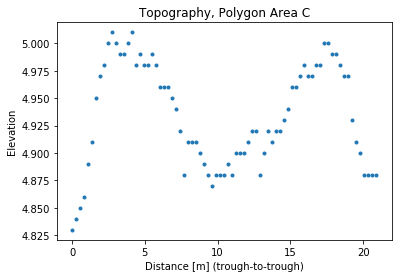

In [4]:
plt.plot(data['Distance_m'], data['Z'],'.')
plt.ylabel('Elevation')
plt.title('Topography, Polygon Area C')
plt.xlabel('Distance [m] (trough-to-trough)')
plt.show()

In [5]:
N1 = False
N2 = False
N3 = True
N4 = False
N5 = False
N6 = False
N7 = False

N3


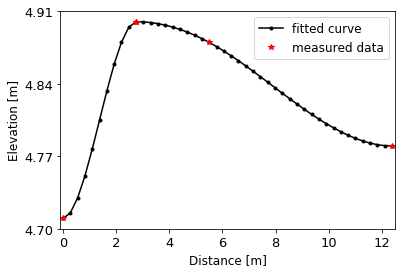

In [11]:
# smooth the topographic data : February 13 and trough cell inward oriented
length = len(data['Distance_m'])
x = []
z = []


x = np.array(data['Distance_m'][:46])
z = np.array(data['Z'][:46])

z = [z1 - 0.1127955 for z1 in z] # match the trough's elevation with the "trough elevation" from water-table data 

#z_smooth = scipy.signal.savgol_filter(Z1, window_length=17, polyorder=3, mode='constant',cval=4.7)
#print z[10], z[20]

if (N1):
    print ('N1')
    x1 = [x[0], x[10]]
    z1 = [4.71, 4.85]
    x2 = [x[10], x[20], x[-1]]
    z2 = [4.85, 4.85-0.02, 4.78]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')

if (N2):
    print ('N2')
    x1 = [x[0], x[10]]
    z1 = [4.71, 4.85]
    x2 = [x[10], x[20], x[-1]]
    z2 = [4.85, 4.85-0.02, 4.80]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')

if (N3):
    print ('N3')
    rim = 4.9
    x1 = [x[0], x[10]]
    z1 = [4.71, rim]
    x2 = [x[10], x[20], x[-1]]
    z2 = [rim, rim-0.02, 4.78]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')

if (N4):
    print ('N4')
    rim = 4.9
    x1 = [x[0], x[10]]
    z1 = [4.71, rim]
    x2 = [x[10], x[20], x[-1]]
    z2 = [rim, rim-0.02, 4.8]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')

if (N5):
    print ('N5')
    rim = 4.83
    x1 = [x[0], x[10]]
    z1 = [4.71, rim]
    x2 = [x[10], x[20], x[-1]]
    z2 = [rim, rim-0.02, 4.78]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')

if (N6):
    print ('N6')
    rim = 4.83
    x1 = [x[0], x[10]]
    z1 = [4.71, rim]
    x2 = [x[10], x[20], x[-1]]
    z2 = [rim, rim-0.02, 4.76]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')
    
if (N7):
    print ('N7')
    rim = 4.9
    x1 = [x[0], x[10]]
    z1 = [4.71, rim]
    x2 = [x[10], x[20], x[-1]]
    z2 = [rim, rim-0.05, 4.71]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')


z_smooth = np.concatenate((cs1(x[:11]), cs2(x[11:])))

z_smooth = np.array([round(s,4) for s in z_smooth])


plt.plot(x, z_smooth, '.-', color = 'k',label = 'fitted curve')
plt.plot(x1,z1,'*', color='r')
plt.plot(x2,z2,'*', color='r',label='measured data')

#print np.array(x), x1, x2
#print z, z1,z2
plt.ylabel('Elevation [m]', fontsize=12,fontweight='normal')
plt.xlabel('Distance [m]',fontsize=12,fontweight='normal')
plt.tick_params(axis='both', which='major', labelsize=13)
#plt.title('Mesh, Polygon Area C (Mesh-N3)')
plt.xlim(-0.1,12.5)
plt.ylim(4.7,4.91)
plt.yticks(np.linspace(4.7,4.91,4))

plt.legend(fontsize=12)
plt.savefig('/Users/ajc/Core/PostProcessData/2019/simulations/barrow-iwp/Meshes/microtopography-N3-jan22.pdf', bbox_inches='tight', dpi=100)
plt.show()

In [10]:
print x, z_smooth
print len(x), len(z_smooth)

[ 0.          0.27521822  0.55043644  0.82565466  1.10087288  1.37609111
  1.65130933  1.92652755  2.20174577  2.47696399  2.75218221  3.02740043
  3.30261865  3.57783688  3.8530551   4.12827332  4.40349154  4.67870976
  4.95392798  5.2291462   5.50436442  5.77958265  6.05480087  6.33001909
  6.60523731  6.88045553  7.15567375  7.43089197  7.70611019  7.98132841
  8.25654664  8.53176486  8.80698308  9.0822013   9.35741952  9.63263774
  9.90785596 10.18307418 10.45829241 10.73351063 11.00872885 11.28394707
 11.55916529 11.83438351 12.10960173 12.38481995] [4.71   4.7153 4.7298 4.751  4.7769 4.805  4.8331 4.859  4.8802 4.8947
 4.9    4.8993 4.8973 4.8941 4.8898 4.8847 4.8788 4.8722 4.8651 4.8577
 4.85   4.8422 4.8343 4.8264 4.8185 4.8106 4.8028 4.7951 4.7875 4.78
 4.7728 4.7658 4.759  4.7526 4.7464 4.7407 4.7353 4.7303 4.7258 4.7218
 4.7184 4.7154 4.7131 4.7114 4.7104 4.71  ]
46 46


In [11]:
reload(meshing_ats)
site_area = 'C'
if site_area == 'A':
    arclen = 16 
elif site_area == 'B':
    arclen = 6 
elif site_area == 'C':
    arclen = 12
elif site_area == 'D':
    arclen = 10

m2 = meshing_ats.Mesh2D.from_Transect_MakePieWedge(x,z_smooth, arclen, curved=False)
m2.plot()
print site_area, arclen

(92, 3) 2
C 12


In [13]:
outfile = "/Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/"
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(1):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1001)
    z = z + 0.02
    Z.append(z)
print ('Moss ', z)

for i in range(4):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1002)
    z = z + 0.02
    Z.append(z)
print ('Peat ', z)

for i in range(15): 
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + 0.02
    Z.append(z)
print ('Upper mineral ', z)

dz = .02
for i in range(35):
    dz *= 1.075
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print ('Ice rich', z)

for i in range(25):
    dz *= 1.12
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print (z)


layer_types.append('snapped')
layer_data.append(-45.0) # bottom location
layer_ncells.append(1)
layer_mat_ids.append(1003)

m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)

m3.write_exodus(outfile + "areaC-3layers-diver-om10cm-N7.exo")


('Moss ', 0.02)
('Peat ', 0.1)
('Upper mineral ', 0.4000000000000001)
('Ice rich', 3.716409519999923)
41.2555869471

You are using exodus.py v 1.05 (beta-cmake), a python wrapper of some of the exodus II library.

Copyright (c) 2013, 2014, 2015, 2016, 2017 National Technology &
Engineering Solutions of Sandia, LLC (NTESS).  Under the terms of
Contract DE-NA0003525 with NTESS, the U.S. Government retains certain
rights in this software.  

Opening exodus file: /Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/areaC-3layers-diver-om10cm-N7.exo
Closing exodus file: /Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/areaC-3layers-diver-om10cm-N7.exo


In [ ]:
#variable peat thickness

outfile = "/Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/"
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(1):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1001*np.ones((m2.num_cells(),),'i'))
    z = z + 0.02
    Z.append(z)
print ('Moss ', z)

for i in range(9):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(-1000*np.ones((m2.num_cells(),),'i'))
    z = z + 0.02
    Z.append(z)
print ('Peat ', z)

for i in range(10): 
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    z = z + 0.02
    Z.append(z)
print ('Upper mineral ', z)

dz = .02
for i in range(35):
    dz *= 1.075
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    z = z + dz
    Z.append(z)
print ('Ice rich', z)

for i in range(25):
    dz *= 1.12
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    z = z + dz
    Z.append(z)
print (z)


layer_types.append('snapped')
layer_data.append(-45.0) # bottom location
layer_ncells.append(1)
layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))


mat_ids=np.zeros((m2.num_cells(), 11), 'i')

for i in range(m2.num_cells()):
    for j in range(11):
        if (Z[j]<=peat_thickness[i]):
            mat_ids[i,j]=1002
        else:
            mat_ids[i,j]=1003
for j in range(11):
    layer_mat_ids[j] = mat_ids[:,j]

print len(layer_mat_ids), len(layer_ncells), len(layer_types), len(layer_data)


m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)


m3.write_exodus(outfile + "areaC-3layers-diver-om10cm.exo")






In [ ]:
# Old z resolution -- November 8, 2018
outfile = "/Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/"
# layer extrusion
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(2):
    layer_types.append('constant')
    layer_data.append(0.01)
    layer_ncells.append(1)
    layer_mat_ids.append(1001)
    z = z + 0.01
    Z.append(z)
print ('Moss ', z)

for i in range(4): 
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1002)
    z = z + 0.02
    Z.append(z)
print ('Peat ', z)

for i in range(20): #8cm peat, n=20, 20cm peat n = 14
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + 0.02
    Z.append(z)
print (z)


dz = .02
for i in range(21):
    dz *= 1.05
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print (z)

for i in range(17):
    dz *= 1.2
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print (z)

for i in range(8):
    dz *= 1.2
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    #print ('5th layer',z)
    z = z + dz
    Z.append(z)
print (Z)
print len(Z)
layer_types.append('snapped')
layer_data.append(-40.0) # bottom location
layer_ncells.append(2)
layer_mat_ids.append(1003)

#print layer_data
m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)

#m3.write_exodus(outfile + "areaC-updist-vladimir-om10cm.exo")
m3.write_exodus(outfile + "areaC-smooth-om10cm.exo")